<a href="https://colab.research.google.com/github/theanhvu1998/VuTheAnh_Assignment/blob/master/Copy_of_Weekly_Project_BBC_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalizaiton error. Don't tweak your model again, you would start overfitting the test set.

## Example: Articles categorization

### Objectives

Build a model to determine the categories of articles. 

### Get Data

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [110]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [111]:
bbc.sample(5)

,category,text
980,sport,claxton hunting first major medal british hurd...
2058,entertainment,new media battle for bafta awards the bbc lead...
2144,entertainment,rock group korn s guitarist quits the guitaris...
1935,politics,lib dems stress budget trust gap public trust ...
1499,entertainment,aviator wins top globes accolades the aviator ...


In [112]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### EDA & Data transformation

In [113]:
# Your code here
from sklearn.model_selection import train_test_split

train, test = train_test_split(bbc, test_size=0.2)


In [114]:
print("total record:", len(bbc.index))

total record: 2225


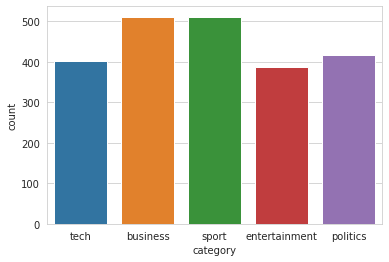

In [115]:
sns.countplot(bbc["category"])

In [116]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]

In [117]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [156]:
import re
def remove_non_word(text):
   emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
   text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
   return text

### Train models

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=remove_non_word)

In [158]:
cfl_models = LogisticRegression(random_state=0)

In [159]:
clf = Pipeline([('vect', tfidf),
                ('clf', cfl_models)])
clf.fit(train["text"], train["category"])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function remove_non_word at 0x7f58196d48c8>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f5819198620>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
          

In [154]:
p_predict = clf.predict_proba(test["text"])
f_predict = clf.predict(test["text"])
p_predict = pd.DataFrame(p_predict).reindex().rename(columns={0: "business",1: "entertainment",2: "politics",3: "sport",4: "tech"}, errors="raise")
f_predict = pd.DataFrame(f_predict).rename(columns={0: "Predict"}, errors="raise")
predict = pd.concat([test["text"].reset_index(), test["category"].reset_index(),f_predict.reindex(),p_predict], axis=1)
predict.drop("index", axis=1)

,text,category,Predict,business,entertainment,politics,sport,tech
0,film row over pirates cannibals plans to por...,entertainment,entertainment,0.147554,0.503423,0.163149,0.081903,0.103971
1,glazer makes new man utd approach malcolm glaz...,business,business,0.584949,0.065104,0.083181,0.215541,0.051226
2,benitez joy as reds take control liverpool bos...,sport,sport,0.036478,0.029924,0.028605,0.853494,0.051499
3,connors rallying cry for british tennis do y...,sport,sport,0.048560,0.100787,0.099710,0.678901,0.072043
4,ukraine revisits state sell-offs ukraine is pr...,business,business,0.739217,0.040972,0.133682,0.032798,0.053331
...,...,...,...,...,...,...,...,...
440,britons fed up with net service a survey condu...,tech,tech,0.146796,0.042874,0.061998,0.046377,0.701955
441,us duo in first spam conviction a brother and ...,tech,tech,0.171570,0.143745,0.134462,0.102929,0.447293
442,wilkinson return unlikely jonny wilkinson lo...,sport,sport,0.008693,0.011042,0.010704,0.959611,0.009950
443,boris opposes mayor apology ken livingstone sh...,politics,politics,0.069141,0.077108,0.682453,0.115049,0.056249


### Evaluate Model

In [160]:
# Using Test dataset to evaluate model
# classification_report
# confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
# Your code here
predictions = clf.predict(test["text"])
print('accuracy:',accuracy_score(test["category"],predictions))
print('confusion matrix:\n',confusion_matrix(test["category"],predictions))
print('classification report:\n',classification_report(test["category"],predictions))

accuracy: 0.9820224719101124
confusion matrix:
 [[102   0   1   0   0]
 [  2  78   0   0   0]
 [  3   0  82   0   1]
 [  0   0   0 100   0]
 [  0   0   1   0  75]]
classification report:
                precision    recall  f1-score   support

     business       0.95      0.99      0.97       103
entertainment       1.00      0.97      0.99        80
     politics       0.98      0.95      0.96        86
        sport       1.00      1.00      1.00       100
         tech       0.99      0.99      0.99        76

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



### Fine-tunning

### Export models


In [165]:
import pickle
import os

pickle.dump(clf, open('logisticRegression.pkl', 'wb'))

In [166]:
with open('logisticRegression.pkl', 'rb') as model:
    reload_model = pickle.load(model)
preds = reload_model.predict_proba(test["text"])

p_predict = clf.predict_proba(test["text"])
f_predict = clf.predict(test["text"])
p_predict = pd.DataFrame(p_predict).reindex().rename(columns={0: "business",1: "entertainment",2: "politics",3: "sport",4: "tech"}, errors="raise")
f_predict = pd.DataFrame(f_predict).rename(columns={0: "Predict"}, errors="raise")
predict = pd.concat([test["text"].reset_index(), test["category"].reset_index(),f_predict.reindex(),p_predict], axis=1)
predict.drop("index", axis=1)

,text,category,Predict,business,entertainment,politics,sport,tech
0,film row over pirates cannibals plans to por...,entertainment,entertainment,0.147554,0.503423,0.163149,0.081903,0.103971
1,glazer makes new man utd approach malcolm glaz...,business,business,0.584949,0.065104,0.083181,0.215541,0.051226
2,benitez joy as reds take control liverpool bos...,sport,sport,0.036478,0.029924,0.028605,0.853494,0.051499
3,connors rallying cry for british tennis do y...,sport,sport,0.048560,0.100787,0.099710,0.678901,0.072043
4,ukraine revisits state sell-offs ukraine is pr...,business,business,0.739217,0.040972,0.133682,0.032798,0.053331
...,...,...,...,...,...,...,...,...
440,britons fed up with net service a survey condu...,tech,tech,0.146796,0.042874,0.061998,0.046377,0.701955
441,us duo in first spam conviction a brother and ...,tech,tech,0.171570,0.143745,0.134462,0.102929,0.447293
442,wilkinson return unlikely jonny wilkinson lo...,sport,sport,0.008693,0.011042,0.010704,0.959611,0.009950
443,boris opposes mayor apology ken livingstone sh...,politics,politics,0.069141,0.077108,0.682453,0.115049,0.056249
